In [10]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from collections import namedtuple
from math import sqrt

In [30]:
Line = namedtuple('Line', ['a', 'b', 'r', 'delta_a', 'delta_b'])

def fit_line(points):
    s = len(points)
    s_x = sum(p[0] for p in points)
    s_y = sum(p[1] for p in points)
    s_xx = sum(p[0]**2 for p in points)
    s_yy = sum(p[1]**2 for p in points)
    s_xy = sum(p[0]*p[1] for p in points)
    
    delta = s * s_xx - (s_x ** 2) 
    a = ( s * s_xy - s_x * s_y ) / delta
    b = (s_xx * s_y - s_x * s_xy) / delta
    
    chi_sqr = s_yy - a*s_xy - b*s_y
    
    delta_a = chi_sqr / (s - 2) * s / delta
    delta_b = delta_a * s_xx / s
    
    r = (s * s_xy - s_x * s_y) / sqrt( (s * s_xx - s_x ** 2) * (s * s_yy - s_y ** 2) )
    
    return Line(a, b, r, delta_a, delta_b)

In [31]:
random_points = []

for point in range(100):
    random_points.append((randint(0, 100), randint(0, 100)))

line = fit_line(random_points)
a, b, r, _,_ = line
line

Line(a=0.08137563184837786, b=44.821906223505295, r=0.08227150681818392, delta_a=0.009915490644571279, delta_b=33.53458597956585)

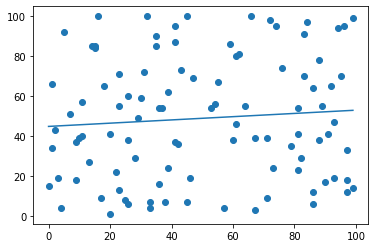

In [32]:
plt.scatter([x[0] for x in random_points], [x[1] for x in random_points])
plt.plot([a*x + b for x in range(100)])

In [33]:
x_eq_y = [(x,x) for x in range(100)]

line2 = fit_line(x_eq_y)
a2, b2, r, _,_ = line2
line2

Line(a=1.0, b=0.0, r=1.0, delta_a=0.0, delta_b=0.0)

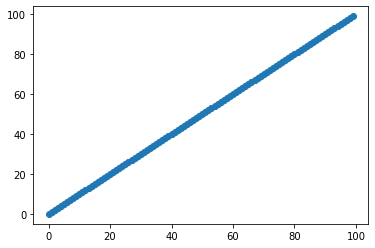

In [34]:
plt.scatter([x[0] for x in x_eq_y], [x[1] for x in x_eq_y])
plt.plot([a2*x + b2 for x in range(100)])

In [29]:
%timeit fit_line(random_points)

88.4 µs ± 536 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
